# Hypothesis Test around Mean, Variance and Proportion

Both parametric and non-parametric hypothesis are used to check whether the mean, variance and proportion of the population have pre-determined values or if the values need to be defined.
 
 ---

### Hypothesis Test around mean

When testing hypotheses about a population mean in statistics, the choice of test depends on whether the population standard deviation is known, the sample size, and whether we’re comparing one mean, two means, or more.

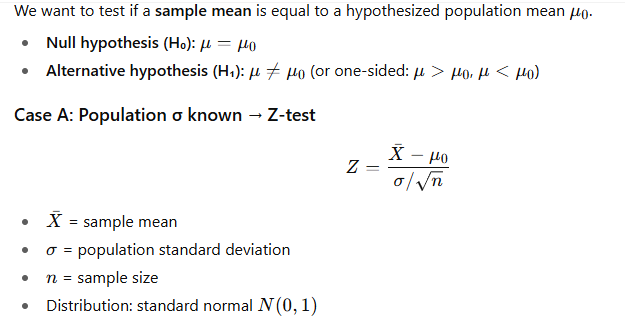

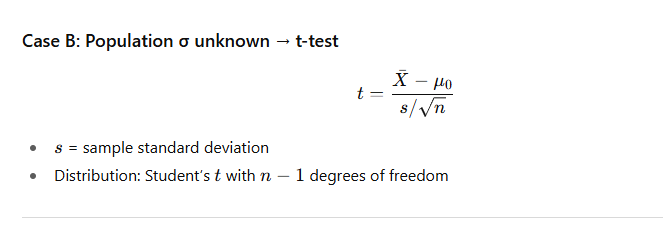

---

**Question**
A nutritionist claims that the average daily protein intake of adults in a city is 50 grams.
A random sample of 25 adults gave the following average intake:

Sample mean = 47 grams

Sample standard deviation= 6 grams

Test at 5% significance level whether the claim is true.

In [10]:
# Sample data
sample_mean <- 47
mu0 <- 50      # hypothesized mean
s <- 6         # sample standard deviation
n <- 25        # sample size

# Manual t-value
t_value <- (sample_mean - mu0) / (s / sqrt(n))
t_value

# p-value (two-tailed)
p_value <- 2 * pt(abs(t_value), df = n-1, lower.tail = FALSE)
p_value

alpha <- 0.05
if (p_value < alpha) {
  print("Reject H0: The average protein intake is significantly different from 50 grams.")
} else {
  print("Fail to Reject H0: No significant evidence that the intake differs from 50 grams.")
}


[1] -2.5

[1] 0.01965418

[1] "Reject H0: The average protein intake is significantly different from 50 grams."


**Question** A machine is supposed to fill juice bottles with 500 ml of juice.
From past experience, the population standard deviation is known to be σ = 10 ml.

A random sample of 36 bottles is taken, and the sample mean is found to be 497 ml.

Test at the 5% significance level whether the machine is filling correctly.

In [9]:
# Known values
mu0 <- 500     # hypothesized mean
xbar <- 497    # sample mean
sigma <- 10    # population standard deviation
n <- 36        # sample size

# Z-test statistic
z_value <- (xbar - mu0) / (sigma / sqrt(n))
z_value
# p-value (two-tailed)
p_value <- 2 * (1 - pnorm(abs(z_value)))
p_value 
# Decision rule at alpha = 0.05
alpha <- 0.05

if (p_value < alpha) {
  print("Reject H0: There is significant evidence that the machine is misfilling bottles.")
} else {
  print("Fail to Reject H0: There is no significant evidence that the machine is misfilling bottles.")
}



[1] -1.8

[1] 0.07186064

[1] "Fail to Reject H0: There is no significant evidence that the machine is misfilling bottles."


### Hypothesis Tests Around Population Variance

We use these when we want to test whether the population variance (or standard deviation) equals some hypothesized value, or when comparing variances between groups

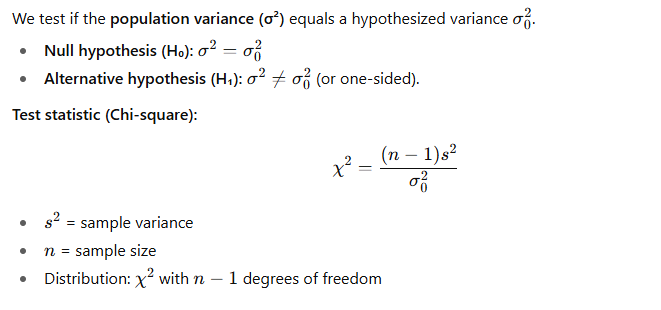

---

**Question** A lab claims the variance of pipette volumes is 𝜎2=4 (µL²).
You take a sample of 16 measurements and find the sample standard deviation s=3.
Test at the 5% significance level whether the population variance differs from 4.

In [4]:
# Given
n <- 16
s <- 3
s2 <- s^2
sigma0_sq <- 4

# chi-square statistic
chi2 <- (n - 1) * s2 / sigma0_sq
chi2


df <- n - 1

# two-tailed p-value
p_lower <- pchisq(chi2, df = df)
p_value <- 2 * min(p_lower, 1 - p_lower)
p_value
# ~ 0.007383

# critical values for alpha = 0.05 (two-tailed)
alpha <- 0.05
lower_crit <- qchisq(alpha/2, df = df)
upper_crit <- qchisq(1 - alpha/2, df = df)
c(lower_crit, upper_crit)
# ~ 6.2621378 27.4883929

# Decision
if (chi2 < lower_crit || chi2 > upper_crit) {
  message("Reject H0: variance differs from ", sigma0_sq)
} else {
  message("Fail to reject H0: not enough evidence to say variance differs from ", sigma0_sq)
}


[1] 33.75

[1] 0.007382951

[1]  6.262138 27.488393

Reject H0: variance differs from 4



### Hypothesis Tests Around Proportions

When we test hypotheses about proportions, we are usually interested in whether a sample proportion is significantly different from:

1. A known or hypothesized population proportion (one-sample test),

2. Another group’s proportion (two-sample test),

3. Multiple groups (chi-square test for more than 2 proportions).

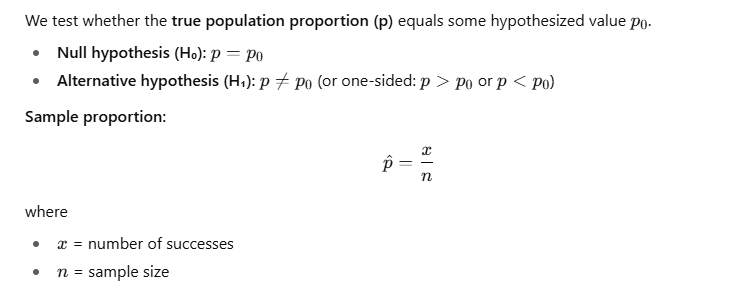

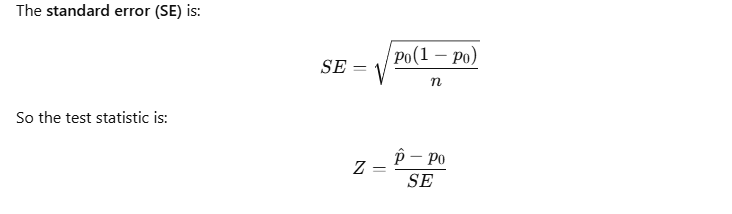

---

**Question** A company claims that 60% of its customers are satisfied with their service.
In a random sample of 100 customers, 54 said they were satisfied.
At the 5% level of significance, test whether the company’s claim is true.

In [11]:
# Given values
x <- 54       # number of successes
n <- 100      # sample size
p0 <- 0.60    # hypothesized proportion

# Sample proportion
phat <- x / n

# Z test statistic
z_value <- (phat - p0) / sqrt(p0 * (1 - p0) / n)
z_value

# Two-tailed p-value
p_value <- 2 * (1 - pnorm(abs(z_value)))
p_value

# Decision
alpha <- 0.05
if (p_value < alpha) {
  print("Reject H0: The true satisfaction proportion is significantly different from 60%.")
} else {
  print("Fail to Reject H0: No significant evidence that satisfaction differs from 60%.")
}


[1] -1.224745

[1] 0.2206714

[1] "Fail to Reject H0: No significant evidence that satisfaction differs from 60%."


--- 
## Summary

| Test                                      | Null & Alternative Hypotheses                                       | Test Statistic Formula                                                                                                                                    | Distribution under H₀             |
| ----------------------------------------- | ------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------- | --------------------------------- |
| **One-Sample Mean (Z-test / t-test)**     | $H_0 : \mu = \mu_0$ <br> $H_a : \mu \neq \mu_0$                     | $Z = \dfrac{\bar{X} - \mu_0}{\sigma / \sqrt{n}}$ <br> (if $\sigma$ known) <br><br> $t = \dfrac{\bar{X} - \mu_0}{s / \sqrt{n}}$ <br> (if $\sigma$ unknown) | Z \~ N(0,1) <br> t \~ t(df = n-1) |
| **One-Sample Variance (Chi-Square test)** | $H_0 : \sigma^2 = \sigma_0^2$ <br> $H_a : \sigma^2 \neq \sigma_0^2$ | $\chi^2 = \dfrac{(n-1)s^2}{\sigma_0^2}$                                                                                                                   | $\chi^2$ \~ Chi-square(df = n-1)  |
| **One-Sample Proportion (Z-test)**        | $H_0 : p = p_0$ <br> $H_a : p \neq p_0$                             | $Z = \dfrac{\hat{p} - p_0}{\sqrt{\dfrac{p_0 (1-p_0)}{n}}}$                                                                                                | Z \~ N(0,1)                       |
